# What is the purpose of data wrangling?

**Convert format of data inorder to analyse in better way.**

In [130]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [107]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [108]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df=pd.read_csv(file_path,names=headers)

In [109]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Deal with missing data

#### **How should you deal with missing data?**

- **Drop data**
    - **Drop the whole row**
    - **Drop the whole column**
- **Replace data**
    - **Replace it by mean**
    - **Replace it by frequency**
    - **Replace it based on other functions**

### **Replace "?" with NAN.**

In [110]:
df.replace("?",np.nan,inplace=True)

In [111]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### **Identifiing Null Values**

In [112]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,(df[i].isnull().sum()/len(df))*100)

normalized-losses 20.0
num-of-doors 0.975609756097561
bore 1.951219512195122
stroke 1.951219512195122
horsepower 0.975609756097561
peak-rpm 0.975609756097561
price 1.951219512195122


In [113]:
for i in ["normalized-losses","stroke","bore","horsepower","peak-rpm"]:
    df[i]=df[i].astype('float')
    df[i].replace(np.nan,df[i].mean(),inplace=True)

In [114]:
df['num-of-doors'].replace(np.nan,df['num-of-doors'].mode()[0],inplace=True)

#### **Delete rows which price is null, cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.**

In [115]:
df.dropna(inplace=True)

In [116]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,(df[i].isnull().sum()/len(df))*100)

In [117]:
df[df.price.isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [118]:
df.shape

(201, 26)

# Data Normalization


**Normalization is the process of transforming values of several variables into a similar range.**

In [119]:
df.length=df.length/df.length.max()
df.width=df.width/df.width.max()
df.height=df.height/df.height.max()

In [120]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


# Binning

#### **Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.**

In [125]:
bins=np.linspace(df.horsepower.min(),df.horsepower.max(),4)

In [127]:
df['horsepower_binned']=pd.cut(df.horsepower,bins=bins,labels=['Low', 'Medium', 'High'],include_lowest=True)

In [128]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low


<BarContainer object of 3 artists>

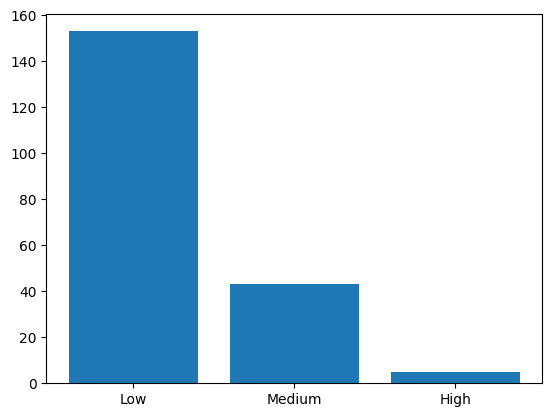

In [131]:
pyplot.bar(['Low', 'Medium', 'High'],df['horsepower_binned'].value_counts())

# Indicator Variable

**What is an indicator variable?**

- An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 


In [136]:
dummy_variable_1=pd.get_dummies(df["fuel-type"]).rename(columns={'diesel':"fuel-type-diesel","gas":"fuel-type-gas"})

In [137]:
df=pd.concat([df,dummy_variable_1],axis=1)

In [139]:
df.drop(columns=['fuel-type'],inplace=True)

In [140]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_binned,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,13495,Low,False,True
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,16500,Low,False,True
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,19,26,16500,Medium,False,True
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,24,30,13950,Low,False,True
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,17450,Low,False,True


In [142]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [144]:
dummy_variable_1=pd.get_dummies(df.aspiration).rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'})

In [145]:
df=pd.concat([df,dummy_variable_1],axis=1)

In [146]:
df.drop(columns=['aspiration'],inplace=True)

In [149]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,21,27,13495,Low,False,True,True,False
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,21,27,16500,Low,False,True,True,False
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154.0,5000.0,19,26,16500,Medium,False,True,True,False
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102.0,5500.0,24,30,13950,Low,False,True,True,False
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115.0,5500.0,18,22,17450,Low,False,True,True,False


In [150]:
df.to_csv('Data_Wrangling_cleaned.csv')